# STAT 201 Group Project

 ### Group 14 - Asteria Xu, Charles Deng, Jessie Sheng, Yaroslav Yaldin

<!-- ## **Predictive Analysis of Academic Performance Utilizing Study Habits and Prior Achievement Metrics** -->
## **A Decade-by-Decade Comparison of Average Movie Ratings**

In [1]:
# libraries needed in this proposal

library(repr)
library(tidyverse)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.1     ✔ rsample      1.1.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.3     ✔ workflows    1.0.0
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.1     ✔ yardstick    1.1.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() ma

## **Introduction**

<!-- #### **Contextual Background and Relevance of the Topic** -->

For nearly a century, the cinema industry has been an important source of entertainment. However, modern audiences are losing patience with films due to the abundance of short videos such as TikTok, Instagram (Reels), and Youtube, finding that monotonous movie plots tire them. Additionally, the key to writing a successful script is not about the box office performance of the movie, but about the way the story is told (Jehoshua et al. p 887). Directors and scriptwriters should put effort in creating a movie plot, as the plot structure and setting of the film will undoubtedly influence the audience's viewing experience and consequently the rating (Xie, H et al.). 

<!-- #### **Primary Objectives and Research Questions of Our Project** -->
#### **Primary Objectives and Research Question**

People's tastes in films are constantly evolving, and some claim that the movie industry is dying in recent decades. In this case, our group aims to explore movie ratings of the past two decades to answer the following question: 

> **Is the average audience rating of movies from 2001-2010 significantly greater than the average audience rating of movies from 2011-2020?**


<!-- #### **Comprehensive Description and Justification of the Dataset Employed** -->
#### **Dataset Description**

The Kaggle “Movie Industry” dataset we will use for our analysis contains data collected from IMDb. It includes both qualitative and quantitative variables such as name, genre, runtime, year, and rating on movies from 1980 to 2020. We will only be focusing on the IMDb scores of movies and the years 2001 to 2020 for our report.

#### **Response Variable**

For the response variable, the location parameter of interest is the difference in mean movie ratings between 2001-2010 and 2011-2020, and the scale parameter is the standard deviation. The two sample distributions are both unimodal and close to a normal distribution, but slightly left-skewed. However, the sample sizes are large (n = ~2000) and they are independent, so the CLT is applicable. 

## **Preliminary Exploratory Data Analysis**

#### **Data Acquisition**

Initially, we imported the dataset we intend to use in our study into a CSV format. Then, we uploaded this csv file into a dedicated remote repository for this project. In the code snippet below, we load the raw format of this csv formated content into this report.

In [2]:
# download data from our group's remote repository

url <- "https://raw.githubusercontent.com/yyaldin/stat201pr/main/movies.csv"

data <- read_csv(url)
cat("Table 1: Data summary")
data

Rows: 7668 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): name, rating, genre, released, director, writer, star, country, com...
dbl (6): year, score, votes, budget, gross, runtime

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Table 1: Data summary

name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,1.9e+07,46998772,Warner Bros.,146
The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4.5e+06,58853106,Columbia Pictures,104
Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,1.8e+07,538375067,Lucasfilm,124
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Saving Mbango,NA,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,NA,Embi Productions,NA
It's Just Us,NA,Drama,2020,"October 1, 2020 (United States)",NA,NA,James Randall,James Randall,Christina Roz,United States,15000,NA,NA,120
Tee em el,NA,Horror,2020,"August 19, 2020 (United States)",5.7,7,Pereko Mosia,Pereko Mosia,Siyabonga Mabaso,South Africa,NA,NA,PK 65 Films,102


#### **Initial Data Summary (Exploratory Data Analysis)**

In order to analyze the data for two distinct time periods, we first subset the data into two different frames: one for the years 2001 to 2010, and another for the years 2011 to 2020. The subsetting is based on the 'year' variable within our dataset.

After we have these two subsets, we further refine the data through a 'tidying' process. During this process, we discard any row in each subset that contains a missing or 'NA' value for the 'score' variable. This is done to ensure that all the data we analyze is complete and reliable, as incomplete rows could potentially skew our results or interpretations.

Lastly, we narrow down the columns in our subsets to only include the 'name', 'year', and 'score' variables. These are the only variables we require for our analysis, and removing extraneous columns makes the data more manageable and focused.

The resulting output consists of two clean, tidy data sets ready for analysis: one for the period 2001 - 2010, and another for the period 2011 - 2020.

In [3]:
# Subset the data for the two periods
data_2001_2010 <- filter(data, year >= 2001 & year <= 2010)%>%
    filter(!is.na(score))%>%
    select(name, year, score)
data_2011_2020 <- filter(data, year >= 2011 & year <= 2020)%>%
    filter(!is.na(score))%>%
    select(name, year, score)
cat("Table 2: Tidy Data Summary (2001 - 2010 years)")
data_2001_2010
cat("Table 3: Tidy Data Summary (2011 - 2020 years)")
data_2011_2020

Table 2: Tidy Data Summary (2001 - 2010 years)

name,year,score
<chr>,<dbl>,<dbl>
Harry Potter and the Sorcerer's Stone,2001,7.6
The Fast and the Furious,2001,6.8
The Lord of the Rings: The Fellowship of the Ring,2001,8.8
⋮,⋮,⋮
Passion Play,2010,4.6
Kaboom,2010,5.7
Everything Must Go,2010,6.4


Table 3: Tidy Data Summary (2011 - 2020 years)

name,year,score
<chr>,<dbl>,<dbl>
Captain America: the First Avenger,2011,6.9
Thor,2011,7.0
Harry Potter and the Deathly Hallows: Part 2,2011,8.1
⋮,⋮,⋮
Dream Round,2020,4.7
Saving Mbango,2020,5.7
Tee em el,2020,5.7


With our tidy data subsets for the two periods in place, we now proceed to compute several descriptive statistics: the mean, median, and standard deviation of the 'score' variable for each subset. These statistics are calculated using the respective functions 'mean()', 'median()', and 'sd()' from the R language. To ensure that any remaining 'NA' values are not included in these calculations, the 'na.rm = TRUE' argument is used.

Each of these calculations is performed within the 'summarise()' function, which allows us to generate these statistics for each subset and save them into new data frames: 'summary_2001_2010' for the first period and 'summary_2011_2020' for the second.

Finally, the summary statistics for both periods are combined into a single data frame, 'parameters', using the 'rbind()' and 'cbind()' functions. This data frame now presents a summary of the central tendency (mean, median) and the dispersion (standard deviation) of the 'score' variable for both time periods.

The output is a clear and concise table of descriptive statistics for our two time periods, ready for interpretation and further analysis.

In [4]:
# Compute parameters
summary_2001_2010 <- data_2001_2010 %>%
  summarise(sample_mean = mean(score, na.rm = TRUE),
            sample_median = median(score, na.rm = TRUE),
            sample_sd = sd(score, na.rm = TRUE),
            sample_var = var(score, na.rm = TRUE),
            n = n())

summary_2011_2020 <- data_2011_2020 %>%
  summarise(sample_mean = mean(score, na.rm = TRUE),
            sample_median = median(score, na.rm = TRUE),
            sample_sd = sd(score, na.rm = TRUE),
            sample_var = var(score, na.rm = TRUE),
            n = n())

# Combine both summaries into one data frame
parameters <- rbind(cbind(Period = "2001-2010", summary_2001_2010), 
                    cbind(Period = "2011-2020", summary_2011_2020))

cat("Table 4: Descriptive Statistics")
parameters

Table 4: Descriptive Statistics

Period,sample_mean,sample_median,sample_sd,sample_var,n
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
2001-2010,6.425050,6.5,1.0069680,1.0139845,2000
2011-2020,6.517179,6.6,0.8853659,0.7838728,1822


Table 4 presents the descriptive statistics for the 'score' variable across two different periods: 2001-2010 and 2011-2020.

During the 2001-2010 period, the average (mean) score was approximately 6.43, with a median score of 6.5. The standard deviation, which measures the variability or dispersion of the scores, was approximately 1.01. This indicates a relatively moderate spread of scores around the mean.

In the 2011-2020 period, the mean score increased slightly to around 6.52, with the median score also rising to 6.6. The standard deviation during this period was approximately 0.89, indicating a somewhat tighter distribution of scores around the mean compared to the previous period.

These results suggest that while the central tendency of scores (as measured by the mean and median) increased slightly in the latter period, the dispersion of scores (as measured by the standard deviation) decreased. This indicates a modest overall improvement in scores from the first period to the second, along with a reduction in score variability.

In [5]:
# Compute difference of means
diff_mean <- summary_2011_2020$sample_mean - summary_2001_2010$sample_mean
diff_mean

[1] 0.09212892

In [6]:
# Compute standard error for the difference of means
SE_diff <- sqrt((summary_2001_2010$sample_sd^2 / summary_2001_2010$n) +
                (summary_2011_2020$sample_sd^2 / summary_2011_2020$n))

SE_diff

[1] 0.03061403

In [7]:
# Compute degrees of freedom
df <- summary_2001_2010$n + summary_2011_2020$n - 2
df

[1] 3820

In [8]:
# Compute the degrees of freedom using the Welch-Satterthwaite equation
df_welch <- (
    (summary_2001_2010$sample_sd^2 / summary_2001_2010$n + summary_2011_2020$sample_sd^2 / summary_2011_2020$n)^2
) / (
    (summary_2001_2010$sample_sd^4 / (summary_2001_2010$n^2 * (summary_2001_2010$n - 1))) +
    (summary_2011_2020$sample_sd^4 / (summary_2011_2020$n^2 * (summary_2011_2020$n - 1)))
)

df_welch

[1] 3815.233

In [9]:
summary_stats <- tibble(
  n_sample_01_10 = summary_2001_2010$n,
  mean_sample_01_10 = summary_2001_2010$sample_mean,
  n_sample_11_20 = summary_2011_2020$n,
  mean_sample_11_20 = summary_2011_2020$sample_mean,
  diff_in_means = diff_mean,
  std_error = SE_diff,
  df = df,
  df_welch = df_welch
)
summary_stats

n_sample_01_10,mean_sample_01_10,n_sample_11_20,mean_sample_11_20,diff_in_means,std_error,df,df_welch
<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2000,6.42505,1822,6.517179,0.09212892,0.03061403,3820,3815.233


#### **Data Visualization**

These series of visualizations provide an insightful exploration of movie ratings data, divided into two periods, 2001-2010 and 2011-2020. With the use of histograms, a box plot, and density plots, we're able to investigate the distribution, central tendency, and variability of movie ratings over the two periods. This enables a comprehensive comparison of the statistical characteristics of these ratings, setting the stage for further in-depth analysis and interpretation.

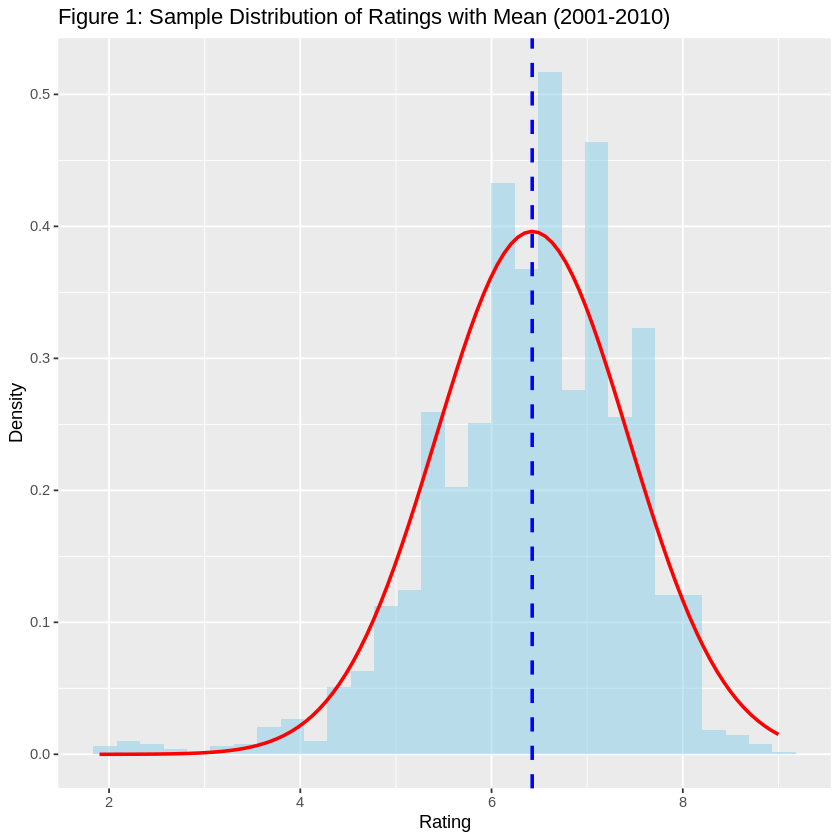

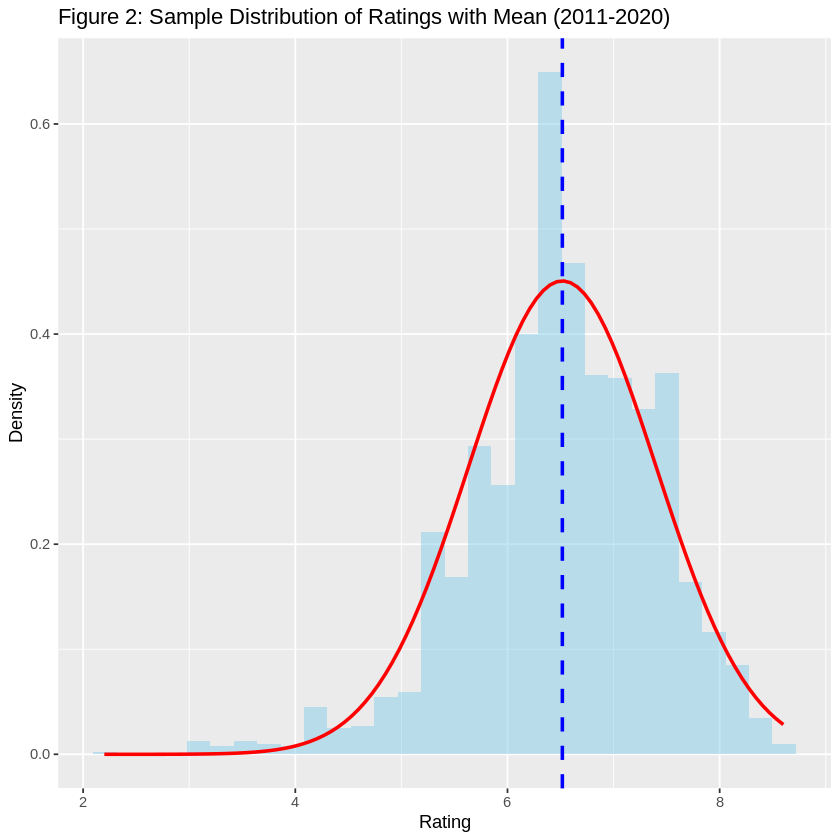

In [10]:
# Calculate x and y coordinates for the normal curve
x <- seq(min(data_2001_2010$score, na.rm = TRUE), max(data_2001_2010$score, na.rm = TRUE), length.out = 100)
y <- dnorm(x, mean = mean(data_2001_2010$score, na.rm = TRUE), sd = sd(data_2001_2010$score, na.rm = TRUE))
df_norm_2001_2010 <- data.frame(x = x, y = y)

x <- seq(min(data_2011_2020$score, na.rm = TRUE), max(data_2011_2020$score, na.rm = TRUE), length.out = 100)
y <- dnorm(x, mean = mean(data_2011_2020$score, na.rm = TRUE), sd = sd(data_2011_2020$score, na.rm = TRUE))
df_norm_2011_2020 <- data.frame(x = x, y = y)

# Plot histogram with normal distribution curve for 2001-2010 data
ggplot(data_2001_2010, aes(x = score)) + 
  geom_histogram(aes(y = ..density..), bins = 30, fill = "skyblue", alpha = 0.5) +
  geom_vline(aes(xintercept = mean(score, na.rm = TRUE)), color = "blue", linetype = "dashed", size = 1) +
  geom_line(data = df_norm_2001_2010, aes(x = x, y = y), colour = "red", size = 1) +
  ggtitle("Figure 1: Sample Distribution of Ratings with Mean (2001-2010)") +
  xlab("Rating") +
  ylab("Density")

# Plot histogram with normal distribution curve for 2011-2020 data
ggplot(data_2011_2020, aes(x = score)) + 
  geom_histogram(aes(y = ..density..), bins = 30, fill = "skyblue", alpha = 0.5) +
  geom_vline(aes(xintercept = mean(score, na.rm = TRUE)), color = "blue", linetype = "dashed", size = 1) +
  geom_line(data = df_norm_2011_2020, aes(x = x, y = y), colour = "red", size = 1) +
  ggtitle("Figure 2: Sample Distribution of Ratings with Mean (2011-2020)") +
  xlab("Rating") +
  ylab("Density")

The histograms displayed in Figures 1 and 2 depict the distribution of movie ratings for the two periods: 2001-2010 and 2011-2020 respectively. Both distributions appear approximately normal and symmetric, with the dashed blue line indicating the mean rating for each period. The red curve on each plot represents the ideal normal distribution based on the mean and standard deviation of the corresponding period's ratings. The close fit between the histogram and this curve reinforces the normality of the data, thus justifying the use of statistical methods for subsequent inferential analysis, and eliminates the necessity for bootstrapping.

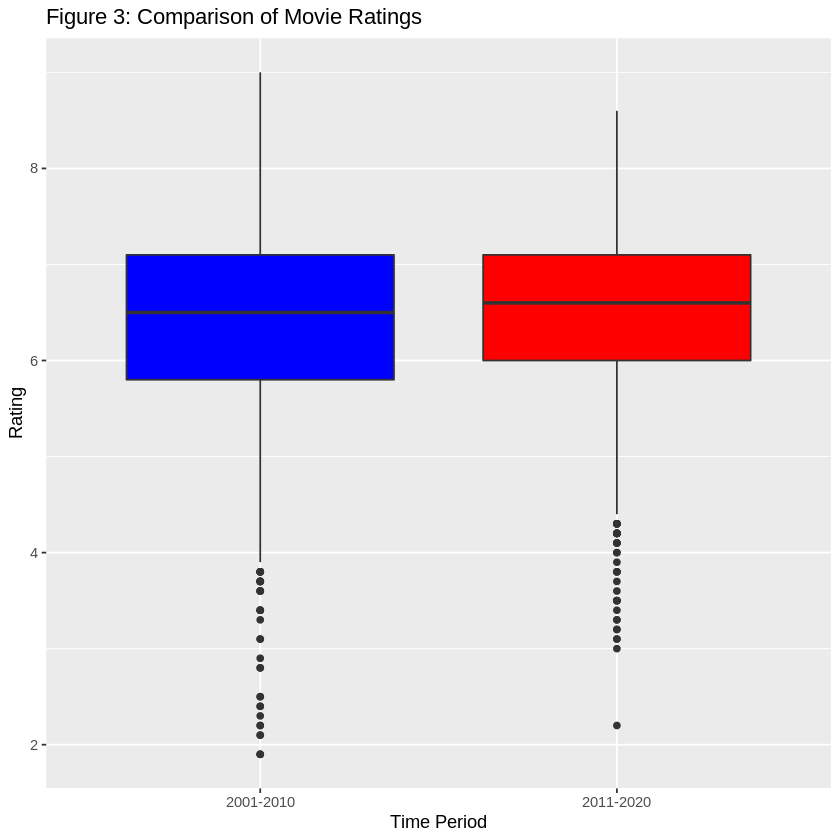

In [11]:
ggplot() +
  geom_boxplot(data = data_2001_2010, aes(x = "2001-2010", y = score), fill = "blue") +
  geom_boxplot(data = data_2011_2020, aes(x = "2011-2020", y = score), fill = "red") +
  xlab("Time Period") +
  ylab("Rating") +
  ggtitle("Figure 3: Comparison of Movie Ratings")


Figure 3 presents box plots comparing the movie ratings between the two periods: 2001-2010 and 2011-2020. These box plots provide a clear visualization of the central tendency and spread of the movie ratings. The boxes represent the interquartile range (IQR), i.e., the middle 50% of ratings, for each period, with the line inside each box marking the median rating. It can be observed that the IQR and median ratings are quite similar across the two periods, suggesting no significant difference in the central tendency and dispersion of movie ratings between the two time periods. Further, there appear to be no significant outliers in either dataset. This visual comparison supports our inferential question about whether there is a meaningful difference in movie ratings between the two decades.

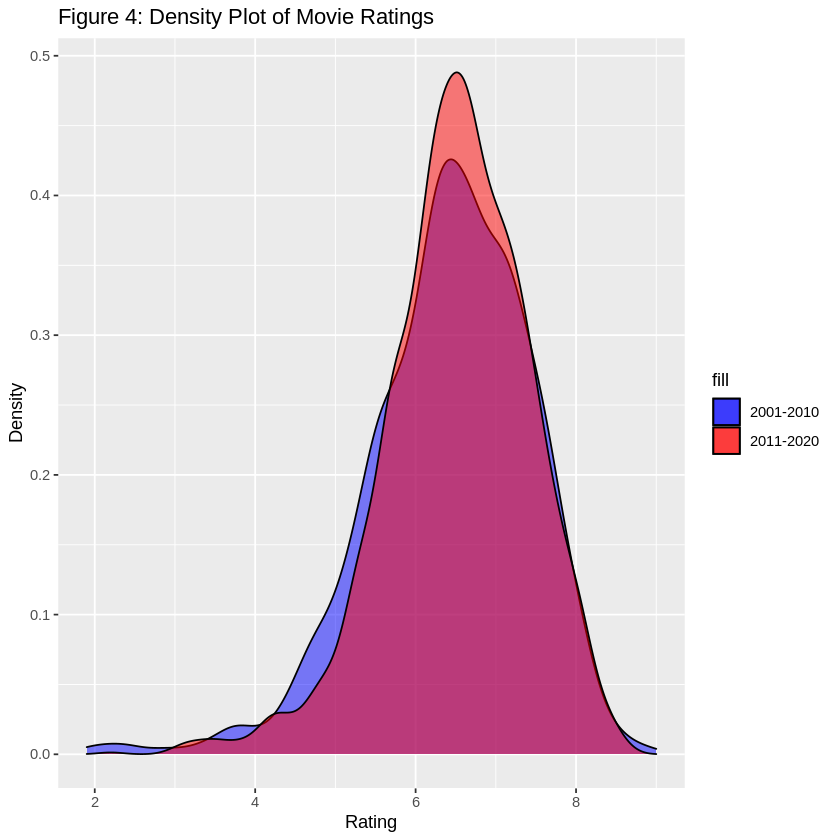

In [12]:
ggplot() +
  geom_density(data = data_2001_2010, aes(x = score, fill = "2001-2010"), alpha = 0.5) +
  geom_density(data = data_2011_2020, aes(x = score, fill = "2011-2020"), alpha = 0.5) +
  xlab("Rating") +
  ylab("Density") +
  ggtitle("Figure 4: Density Plot of Movie Ratings") +
  scale_fill_manual(values = c("blue", "red"))

Figure 4 showcases the density plots of movie ratings from the two periods: 2001-2010 and 2011-2020. Density plots provide a smoother visualization of data distribution than histograms, effectively smoothing out the noise. The two distributions are plotted on the same graph to make a comparative analysis easier. From the overlaid density plots, it can be observed that the distributions of both time periods have a considerable amount of overlap, indicating a similarity in the distribution of movie ratings across the two decades. The distribution for the period 2001-2010 shows a slightly wider spread, implying a greater variety in movie ratings. In contrast, the distribution for 2011-2020 seems to be slightly more peaked, indicating a concentration of ratings around the mean. This visualization aids in understanding the subtle changes in the distribution of movie ratings over time.

## **Methods: Plan**

<!-- #### **Data Analysis Plan and Chosen Variables** -->

The dataset we will use for our report acquired movie ratings from the IMDb online database. According to IMDb, their movie ratings are calculated using a consistent and unbiased formula, making it a reliable indicator of the general public’s opinion. Furthermore, we have cleaned and tidied the data such that missing or ‘NA’ entries, as well as extraneous columns, are removed. Additionally, the Kaggle dataset is updated up to 2020, with 200 movies per year for 2001-2019, and 25 movies from 2020. The large sample size enables a more reliable and generalizable basis for our analysis. 

While the plots and preliminary analysis on the dataset provide a general idea of the distribution and point estimate for the population parameter of interest, they do not make for a sufficient analysis and decision-making. In order to obtain further statistical evidence and reliable results to provide stakeholders, we will use hypothesis testing and calculate confidence intervals regarding the parameter, as described below.

#### **Hypothesis Testing**

We plan to conduct hypothesis tests using the p-value approach with a 5% significance level, and also analyze the confidence interval of the difference using a 95% confidence level. Testing will be completed by following the whole process of hypothesis testing in R, and also using the `t.test` function to confirm our calculations.

To understand if the average IMDb movie rating of 2001 to 2010 movies are significantly greater than that of 2011 to 2020 movies, we will perform a two-sample t-test with the following hypotheses: 

Let $\mu_1$ be the average IMDb rating for movies between 2001 and 2010.

Let $\mu_2$ be the average IMDb rating for movies between 2011 and 2020.

$H_0: \mu_1- \mu_2 = 0$ 

$H_1: \mu_1- \mu_2 > 0$ 

We will be comparing the means of two independent populations, and we choose to use the t-distribution as we do not have access to the population data, but a sample instead. 

Hence we have,

Test statistic: 
$$
T = \frac{\bar{x}-\bar{y} - d_0}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}} }
$$

Null model: $t$-distribution with approximately $\nu$ degrees of freedom, where 
$$
\nu = \frac{
    \left(\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}\right)^2
}
{
\frac{s_1^4}{n_1^2(n_1-1)}+\frac{s_2^4}{n_2^2(n_2-1)}
}
$$

<!-- 
#### **Visualization of Results** -->



## **Expected Outcomes and Significance**

#### **Expected Findings**

Our objective is to determine whether there is a significant difference in the average quality of movies produced between the two decades, and we aim to test the hypothesis concerning the mean scores (IMDb rating) of movies. Based on the preliminary analysis, we expect that the two decades will have similar mean movie ratings, and 2001-2010 movies do not have a significantly greater rating than 2011-2020 movies.

#### **Implications of Findings**

By gaining a more comprehensive insight of how films have evolved over time, it may help filmmakers and studios make investment decisions that better equip the industry to adapt to changing performances and ensure the continued production of high-quality films.

#### **Future Research Questions**

The study could inspire future research in the movie industry, encouraging exploration into other factors that might have influenced the movie quality in each decade, such as technological advancements, narrative and storytelling structures, or cultural influences. 

## **References**



Grijalva, D. (2021, July 23). Movie Industry. Kaggle. https://www.kaggle.com/datasets/danielgrijalvas/movies 

Jehoshua Eliashberg, Sam K. Hui, Z. John Zhang, (2007) From Story Line to Box Office: A New Approach for Green-Lighting Movie Scripts. Management Science 53(6):881-893. https://doi.org/10.1287/mnsc.1060.0668

Xie, H., Wang, H., Zhao, C., Wang, Z. (2019). Movie Score Prediction Model Based on Movie Plots. In: Mao, R., Wang, H., Xie, X., Lu, Z. (eds) Data Science. ICPCSEE 2019. Communications in Computer and Information Science, vol 1059. Springer, Singapore. https://doi.org/10.1007/978-981-15-0121-0_49
